In [ ]:
Diabetes Prediction using Machine Learning Algorithms

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [3]:
# Step 1: Load the Dataset
data = pd.read_csv("/content/diabetes.csv")  # Replace with your file path
print("Dataset loaded successfully!")
print(data.info())
print(data.head())

Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0

In [4]:
# Step 2: Data Preprocessing
# Handling Missing Data
data.fillna(data.median(), inplace=True)  # Replace NaN with the median
print("Missing data handled.")

Missing data handled.


In [5]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [6]:
# Normalization/Standardization
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])
print("Data normalized.")

Data normalized.


In [7]:
print(data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [8]:
# Categorical Encoding
data = pd.get_dummies(data, drop_first=True)
print("Categorical data encoded.")

Categorical data encoded.


In [9]:
print(data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [10]:
# Splitting the dataset into train and test sets
X = data.drop('Outcome', axis=1)  # Replace 'target_column' with the name of your target column
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

Data split into training and testing sets.


In [11]:
print(X)
print(y)
print(data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [12]:
# Step 3: Model Selection
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Initialize the regressor
dt = DecisionTreeRegressor(random_state=42)

# Fit the model
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [13]:
print(dt)
print(data)

DecisionTreeRegressor(random_state=42)
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   



In [14]:
# Support Vector Machine
from sklearn.svm import SVR

# Initialize the SVR model (Support Vector Regressor)
svm = SVR(kernel='rbf')

# Fit the model
svm.fit(X_train, y_train)


SVR()

In [15]:
print(svm)

SVR()


In [16]:
print(data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [17]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

print("Models trained successfully.")


Models trained successfully.


In [18]:
print(lr)
print(lr.fit(X_train, y_train))

LinearRegression()
LinearRegression()


In [19]:
print(data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [46]:
# Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time
import pandas as pd  # Import pandas if not already imported

# Assuming `data` is already loaded (your dataset with 'Outcome' column)
# Before splitting the dataset, reverse the scaling on 'Outcome'
data['Outcome'] = data['Outcome'].apply(lambda x: 1 if x > 0 else 0)

# Splitting the dataset into train and test sets (after reversing scaling)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (using DecisionTreeClassifier)
dt = DecisionTreeClassifier(random_state=42)

# Capture start time for training and evaluation
start_time = time.time()

# Fit the model on the training data
dt.fit(X_train, y_train)  # Ensure 'X_train' and 'y_train' are defined

# Capture end time for training and evaluation
end_time = time.time()

# Make predictions
y_pred_dt = dt.predict(X_test)

# Convert continuous predictions to discrete labels, if necessary
if y_pred_dt.dtype != int and y_pred_dt.dtype != bool:
    threshold = 0.5
    y_pred_dt = (y_pred_dt > threshold).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Compute metrics
results = {
    'Decision Tree': {
        'Accuracy': accuracy_score(y_test, y_pred_dt),
        'Precision': precision_score(y_test, y_pred_dt, average='binary'),
        'Recall': recall_score(y_test, y_pred_dt, average='binary'),
        'F1 Score': f1_score(y_test, y_pred_dt, average='binary'),
        'Time': end_time - start_time,
        'Confusion Matrix': conf_matrix
    }
}

# Optionally print the results
for model, metrics in results.items():
    print(f"\n{model} Results:")

    for metric, value in metrics.items():
        if metric == 'Confusion Matrix':
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")

print(X)
print(y)
print(data)


Decision Tree Results:
Accuracy: 0.7468
Precision: 0.6250
Recall: 0.7273
F1 Score: 0.6723
Time: 0.0076
Confusion Matrix:
[[75 24]
 [15 40]]
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0

In [43]:
# Support Vector Machine

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # For SVM model (replace with your model if needed)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time
import pandas as pd  # Import pandas if not already imported

# Assuming `data` is already loaded (your dataset with 'Outcome' column)
# Before splitting the dataset, reverse the scaling on 'Outcome'
data['Outcome'] = data['Outcome'].apply(lambda x: 1 if x > 0 else 0)

# Splitting the dataset into train and test sets (after reversing scaling)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (SVM or DecisionTreeClassifier or any model you're using)
svm = SVC(random_state=42)

# Capture start time for training and evaluation
start_time = time.time()

# Fit the model on the training data
svm.fit(X_train, y_train)  # Ensure 'X_train' and 'y_train' are defined

# Capture end time for training and evaluation
end_time = time.time()

# Make predictions
y_pred_svm = svm.predict(X_test)

# Convert continuous predictions to discrete labels, if necessary
if y_pred_svm.dtype != int and y_pred_svm.dtype != bool:
    threshold = 0.5
    y_pred_svm = (y_pred_svm > threshold).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Compute metrics
results = {
    'SVM': {
        'Accuracy': accuracy_score(y_test, y_pred_svm),
        'Precision': precision_score(y_test, y_pred_svm, average='binary'),
        'Recall': recall_score(y_test, y_pred_svm, average='binary'),
        'F1 Score': f1_score(y_test, y_pred_svm, average='binary'),
        'Time': end_time - start_time,
        'Confusion Matrix': conf_matrix
    }
}

# Optionally print the results
for model, metrics in results.items():
    print(f"\n{model} Results:")

    for metric, value in metrics.items():
        if metric == 'Confusion Matrix':
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")

print(X)
print(y)
print(data)


SVM Results:
Accuracy: 0.7273
Precision: 0.6327
Recall: 0.5636
F1 Score: 0.5962
Time: 0.0452
Confusion Matrix:
[[81 18]
 [24 31]]
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0

In [47]:
# Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time
import pandas as pd  # Import pandas if not already imported

# Assuming `data` is already loaded (your dataset with 'Outcome' column)
# Before splitting the dataset, reverse the scaling on 'Outcome'
data['Outcome'] = data['Outcome'].apply(lambda x: 1 if x > 0 else 0)

# Splitting the dataset into train and test sets (after reversing scaling)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (using LogisticRegression)
log_reg = LogisticRegression(random_state=42)

# Capture start time for training and evaluation
start_time = time.time()

# Fit the model on the training data
log_reg.fit(X_train, y_train)  # Ensure 'X_train' and 'y_train' are defined

# Capture end time for training and evaluation
end_time = time.time()

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Convert continuous predictions to discrete labels, if necessary
if y_pred_log_reg.dtype != int and y_pred_log_reg.dtype != bool:
    threshold = 0.5
    y_pred_log_reg = (y_pred_log_reg > threshold).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Compute metrics
results = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_log_reg),
        'Precision': precision_score(y_test, y_pred_log_reg, average='binary'),
        'Recall': recall_score(y_test, y_pred_log_reg, average='binary'),
        'F1 Score': f1_score(y_test, y_pred_log_reg, average='binary'),
        'Time': end_time - start_time,
        'Confusion Matrix': conf_matrix
    }
}

# Optionally print the results
for model, metrics in results.items():
    print(f"\n{model} Results:")

    for metric, value in metrics.items():
        if metric == 'Confusion Matrix':
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")


print(X)
print(y)
print(data)


Logistic Regression Results:
Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607
Time: 0.0366
Confusion Matrix:
[[79 20]
 [18 37]]
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Example models (replace with your initialized models if already defined)
dt = DecisionTreeClassifier()
svm = SVC()
lr = LogisticRegression()

# Ensure the target variable y is binary or discrete
threshold = 0.5  # Example threshold for binary classification
if y.dtype != int and y.dtype != bool:
    y = (y > threshold).astype(int)

# Perform cross-validation
for model_name, model in zip(["Decision Tree", "SVM", "Logistic Regression"], [dt, svm, lr]):
    try:
        cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
        print(f"\n{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    except ValueError as e:
        print(f"\nError with {model_name}: {e}")



Decision Tree Cross-Validation Accuracy: 0.7018

SVM Cross-Validation Accuracy: 0.7604

Logistic Regression Cross-Validation Accuracy: 0.7722


In [49]:
from sklearn.model_selection import cross_val_score
from scipy.stats import friedmanchisquare, ttest_rel
import numpy as np

# Perform cross-validation for each model and store the results
dt_scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
svm_scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
lr_scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy')

# Store results as arrays for statistical tests
scores = np.array([dt_scores, svm_scores, lr_scores])

print(dt_scores)
print(svm_scores)
print(lr_scores)

[0.5974026  0.74025974 0.72727273 0.51948052 0.68831169 0.74025974
 0.80519481 0.79220779 0.67105263 0.75      ]
[0.72727273 0.80519481 0.76623377 0.71428571 0.74025974 0.75324675
 0.77922078 0.81818182 0.69736842 0.80263158]
[0.72727273 0.77922078 0.80519481 0.71428571 0.75324675 0.75324675
 0.80519481 0.80519481 0.75       0.82894737]


In [50]:
# Step 1: Friedman Test
stat, p_value = friedmanchisquare(*scores)
print("\nFriedman Test Results:")
print(f"Statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Significant differences found between the models (reject null hypothesis).")
else:
    print("No significant differences found between the models (fail to reject null hypothesis).")


Friedman Test Results:
Statistic: 12.722222222222241, p-value: 0.001727446260403461
Significant differences found between the models (reject null hypothesis).


In [51]:
# Step 2: Pairwise Comparisons with Paired t-Test
print("\nPairwise Comparisons (Paired t-Test):")
# Decision Tree vs SVM
t_stat, p_value = ttest_rel(dt_scores, svm_scores)
print(f"DT vs SVM - t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Decision Tree vs Logistic Regression
t_stat, p_value = ttest_rel(dt_scores, lr_scores)
print(f"DT vs LR - t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# SVM vs Logistic Regression
t_stat, p_value = ttest_rel(svm_scores, lr_scores)
print(f"SVM vs LR - t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")


Pairwise Comparisons (Paired t-Test):
DT vs SVM - t-statistic: -2.8840, p-value: 0.0181
DT vs LR - t-statistic: -3.6748, p-value: 0.0051
SVM vs LR - t-statistic: -1.5398, p-value: 0.1580


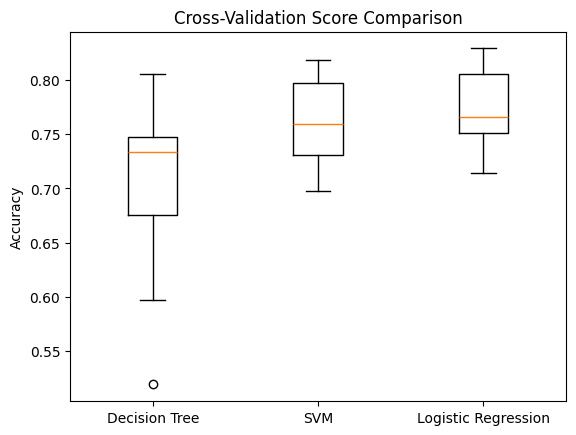

In [52]:
import matplotlib.pyplot as plt

# Plot cross-validation scores for visual comparison
plt.boxplot([dt_scores, svm_scores, lr_scores], labels=["Decision Tree", "SVM", "Logistic Regression"])
plt.title("Cross-Validation Score Comparison")
plt.ylabel("Accuracy")
plt.show()

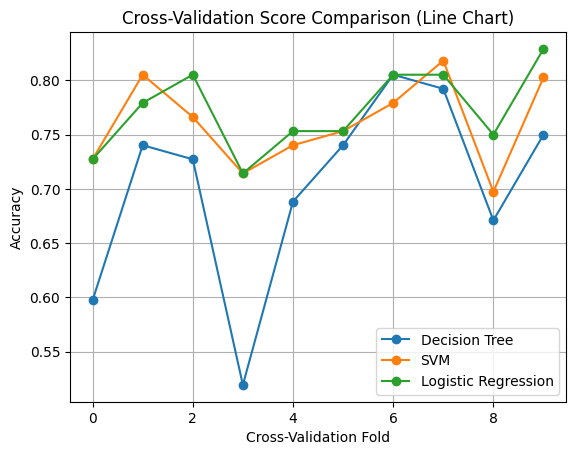

In [56]:
import matplotlib.pyplot as plt

# Line Chart
plt.plot(dt_scores, label="Decision Tree", marker='o')
plt.plot(svm_scores, label="SVM", marker='o')
plt.plot(lr_scores, label="Logistic Regression", marker='o')
plt.title("Cross-Validation Score Comparison (Line Chart)")
plt.xlabel("Cross-Validation Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


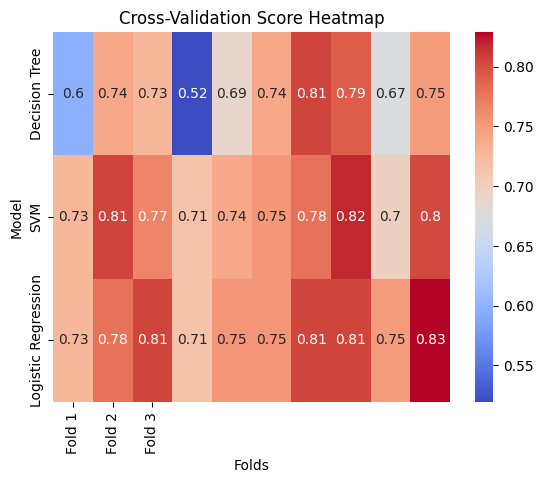

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap
scores = np.array([dt_scores, svm_scores, lr_scores])  # Assuming equal number of folds
sns.heatmap(scores, annot=True, cmap="coolwarm", xticklabels=["Fold 1", "Fold 2", "Fold 3"], yticklabels=["Decision Tree", "SVM", "Logistic Regression"])
plt.title("Cross-Validation Score Heatmap")
plt.xlabel("Folds")
plt.ylabel("Model")
plt.show()

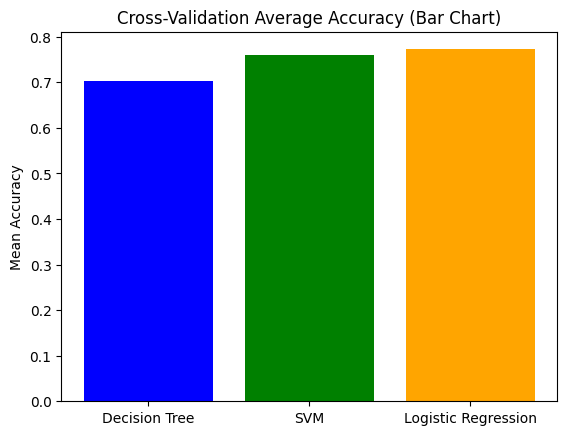

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Bar Chart
means = [np.mean(dt_scores), np.mean(svm_scores), np.mean(lr_scores)]
plt.bar(["Decision Tree", "SVM", "Logistic Regression"], means, color=['blue', 'green', 'orange'])
plt.title("Cross-Validation Average Accuracy (Bar Chart)")
plt.ylabel("Mean Accuracy")
plt.show()

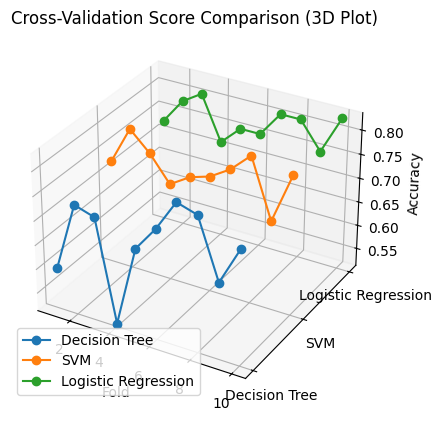

In [61]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
folds = np.arange(1, len(dt_scores) + 1)
ax.plot(folds, dt_scores, zs=1, zdir='y', label="Decision Tree", marker='o')
ax.plot(folds, svm_scores, zs=2, zdir='y', label="SVM", marker='o')
ax.plot(folds, lr_scores, zs=3, zdir='y', label="Logistic Regression", marker='o')
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(["Decision Tree", "SVM", "Logistic Regression"])
ax.set_xlabel("Fold")
ax.set_zlabel("Accuracy")
ax.set_title("Cross-Validation Score Comparison (3D Plot)")
plt.legend()
plt.show()

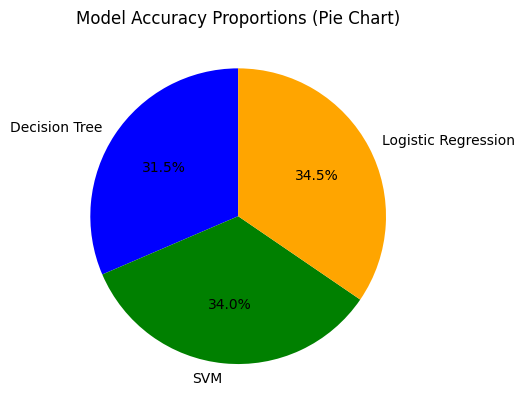

In [62]:
import matplotlib.pyplot as plt
import numpy as np
# Pie Chart
means = [np.mean(dt_scores), np.mean(svm_scores), np.mean(lr_scores)]
labels = ["Decision Tree", "SVM", "Logistic Regression"]
plt.pie(means, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'orange'])
plt.title("Model Accuracy Proportions (Pie Chart)")
plt.show()

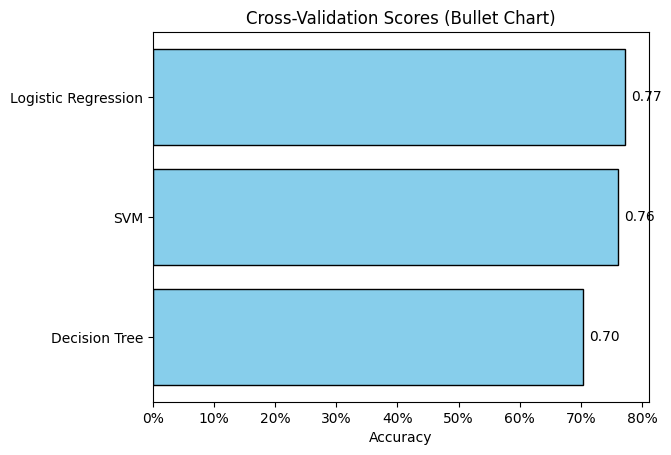

In [65]:
# Bullet Chart
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

models = ["Decision Tree", "SVM", "Logistic Regression"]
means = [np.mean(dt_scores), np.mean(svm_scores), np.mean(lr_scores)]
plt.barh(models, means, color='skyblue', edgecolor='black')
for i, v in enumerate(means):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))  # If accuracy is a fraction
plt.title("Cross-Validation Scores (Bullet Chart)")
plt.xlabel("Accuracy")
plt.show()

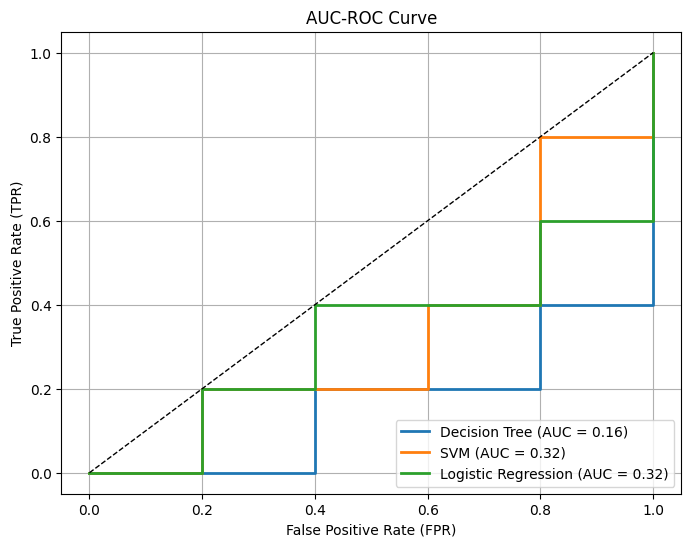

In [66]:
# AUC-ROC Curve

from sklearn.metrics import roc_curve, auc
import numpy as np

# Example data for three models (replace with your actual data)
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1])  # True binary labels
dt_pred_prob = np.random.rand(10)  # Replace with Decision Tree probabilities
svm_pred_prob = np.random.rand(10)  # Replace with SVM probabilities
lr_pred_prob = np.random.rand(10)  # Replace with Logistic Regression probabilities

# Calculate ROC curves and AUC scores
dt_fpr, dt_tpr, _ = roc_curve(y_true, dt_pred_prob)
svm_fpr, svm_tpr, _ = roc_curve(y_true, svm_pred_prob)
lr_fpr, lr_tpr, _ = roc_curve(y_true, lr_pred_prob)

dt_auc = auc(dt_fpr, dt_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
lr_auc = auc(lr_fpr, lr_tpr)

# Plot the AUC-ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})", lw=2)
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_auc:.2f})", lw=2)
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})", lw=2)

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()
